In [14]:
import cv2
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
data_root = "A_Z Handwritten Data.csv"

In [16]:
dataset = pd.read_csv(data_root).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)

In [17]:
letter_x = dataset.drop("label", axis=1)
letter_y = dataset["label"]
(digit_train_x, digit_train_y), (digit_test_x, digit_test_y) = mnist.load_data()

In [18]:
letter_x = letter_x.values

In [19]:
print(letter_x.shape, letter_y.shape)
print(digit_train_x.shape, digit_train_y.shape)
print(digit_test_x.shape, digit_test_y.shape)

(372450, 784) (372450,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [20]:
digit_data = np.concatenate((digit_train_x, digit_test_x))
digit_target = np.concatenate((digit_train_y, digit_test_y))

print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [21]:
digit_target += 26

In [22]:
data = []

for flatten in letter_x:
  image = np.reshape(flatten, (28, 28, 1))
  data.append(image)

letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [23]:
digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))
print(letter_data.shape, letter_target.shape)
print(digit_data.shape, digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


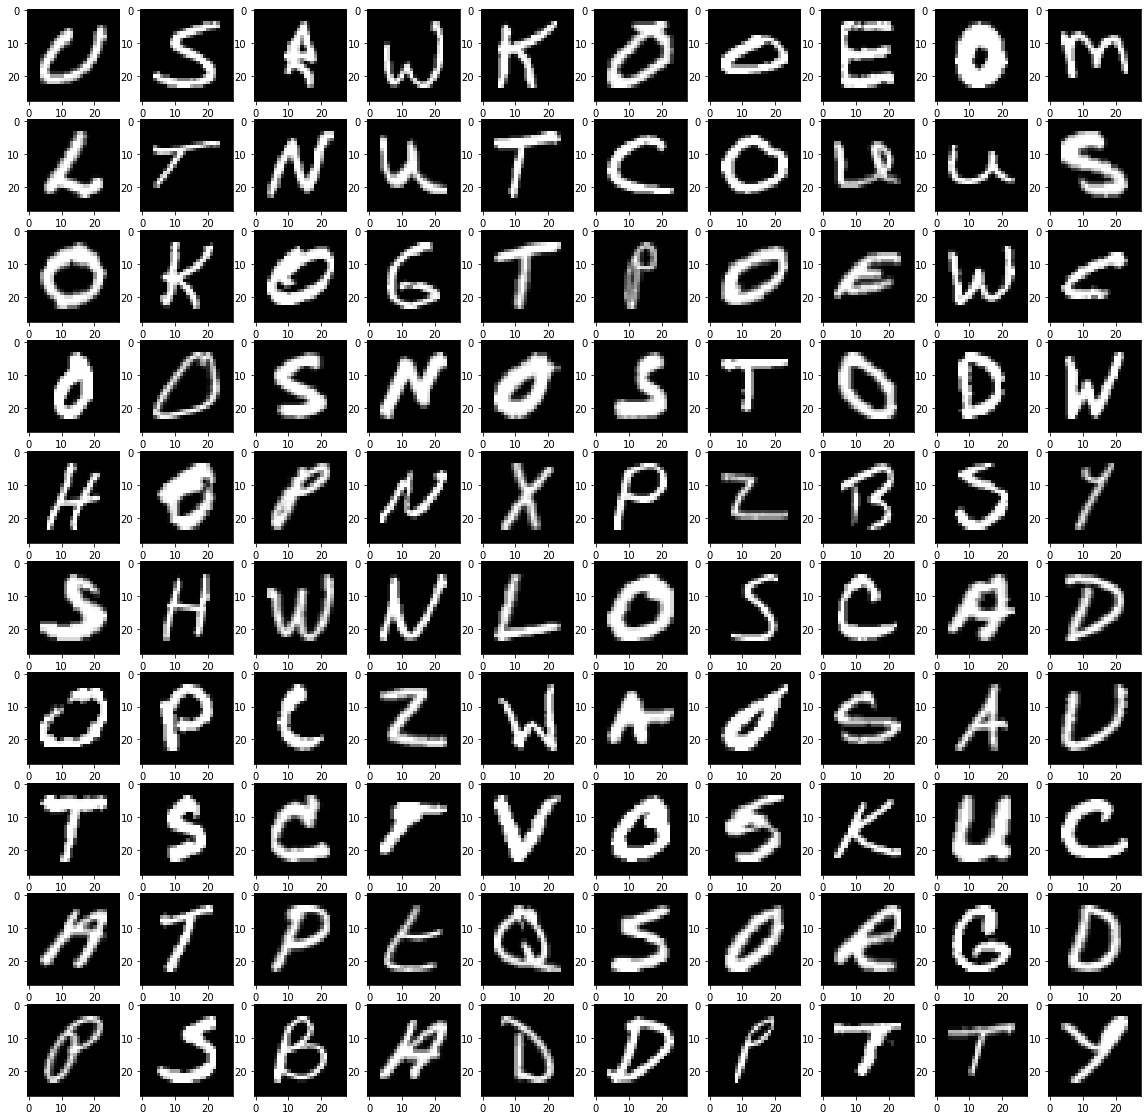

In [24]:
shuffled_data = shuffle(letter_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

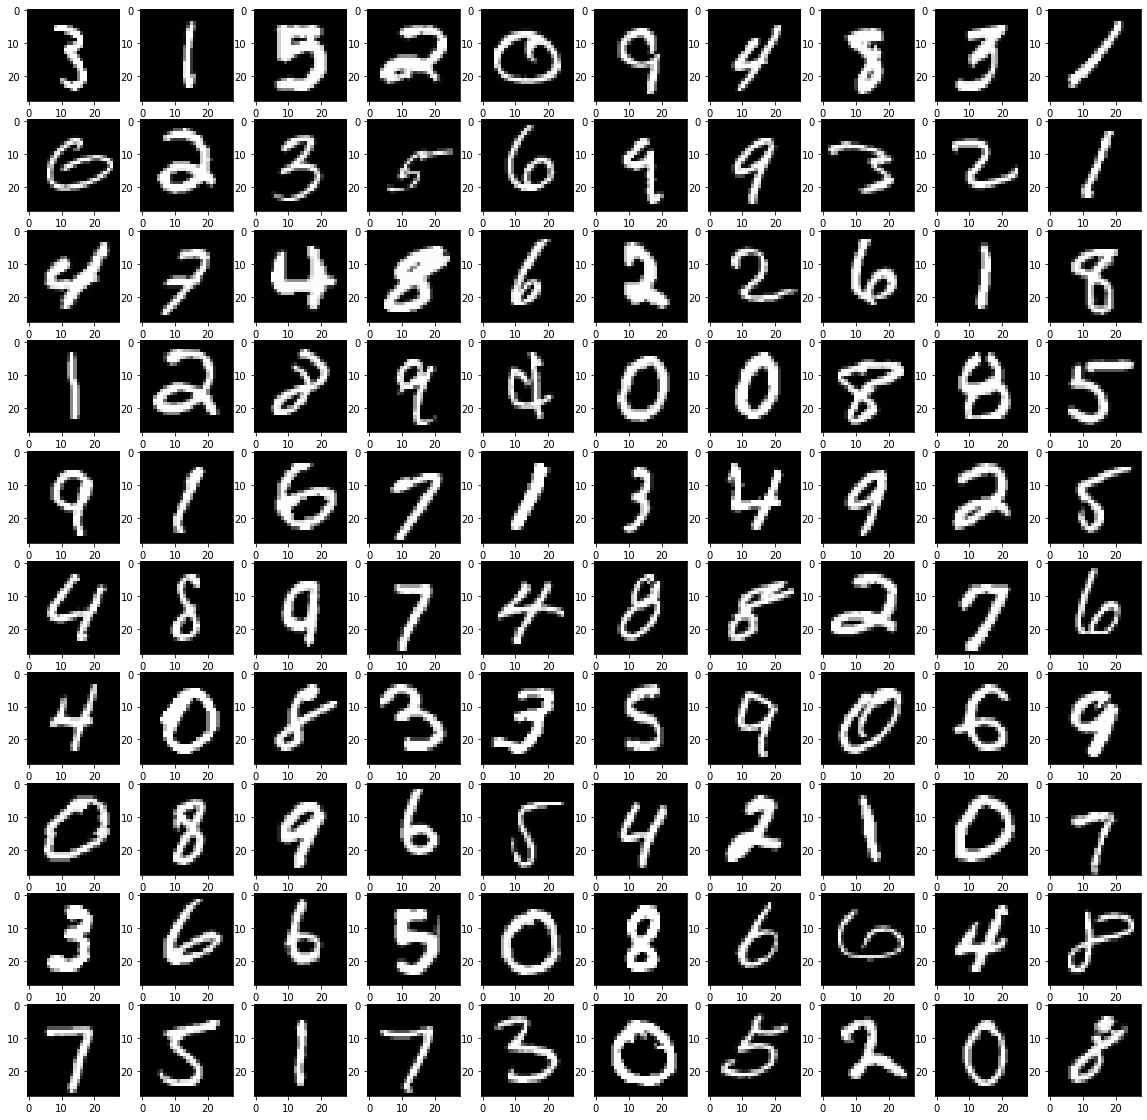

In [25]:
shuffled_data = shuffle(digit_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()


In [26]:
data = np.concatenate((digit_data, letter_data))
target = np.concatenate((digit_target, letter_target))

print(data.shape, target.shape)

(442450, 28, 28, 1) (442450,)


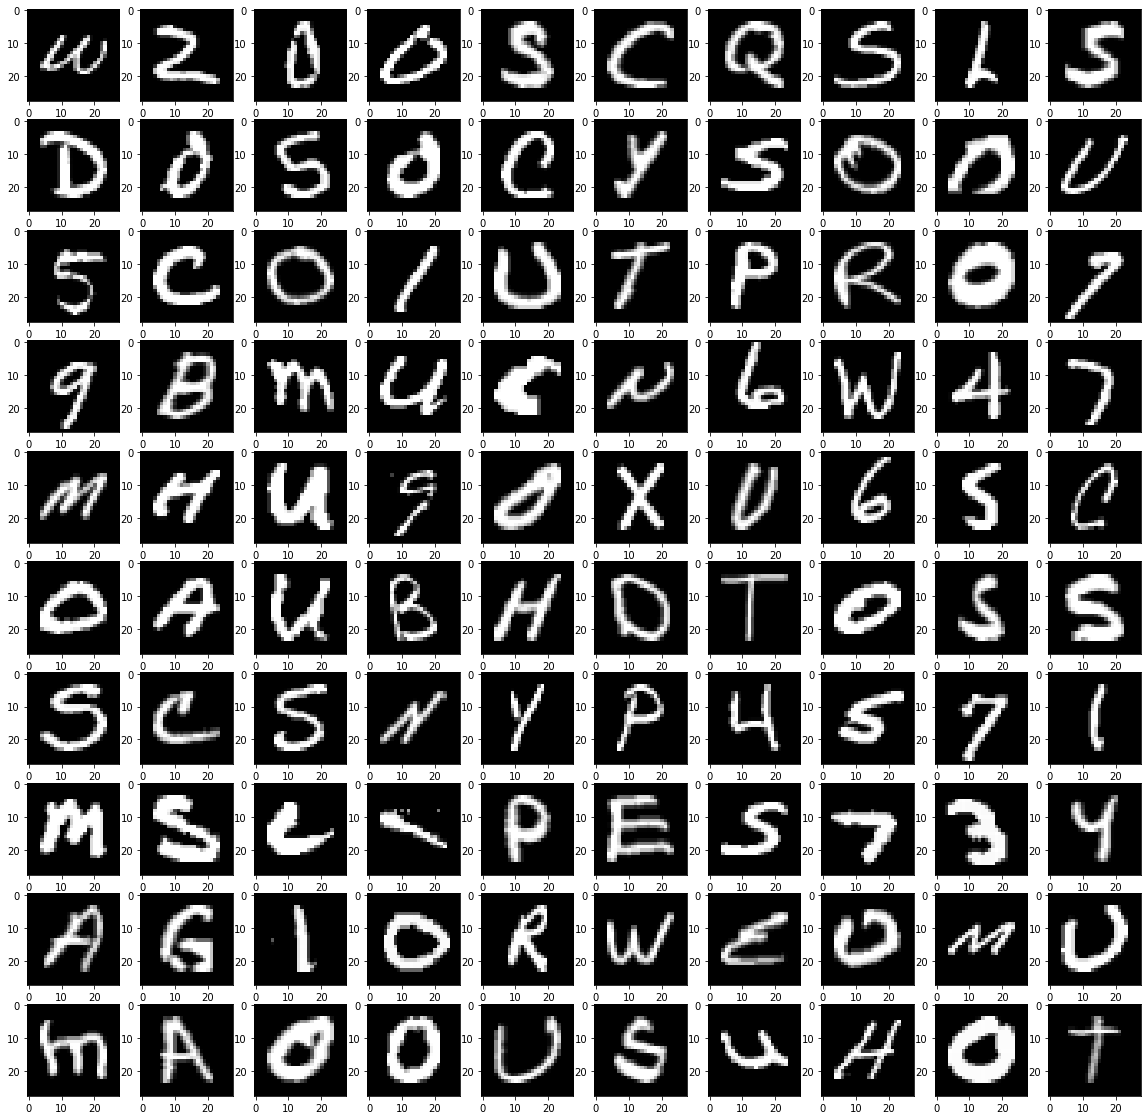

In [27]:
shuffled_data = shuffle(data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


In [29]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


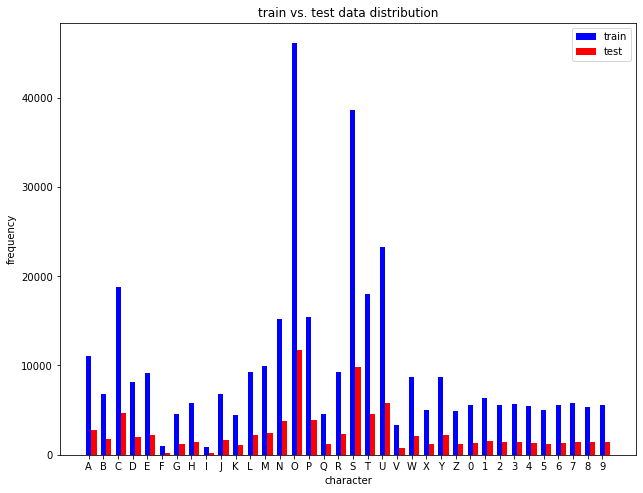

In [30]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1
frequency = [
    train_label_counts, test_label_counts
] 

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [31]:
np.save("train_data", train_data)
np.save("train_labels", train_labels)
np.save("test_data", test_data)
np.save("test_labels", test_labels)

# Modelling


In [32]:
import numpy as np
import visualkeras as vk 
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [33]:
train_data = np.load("train_data.npy")
test_data = np.load("test_data.npy")
train_labels = np.load("train_labels.npy")
test_labels = np.load("test_labels.npy")

In [34]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                        

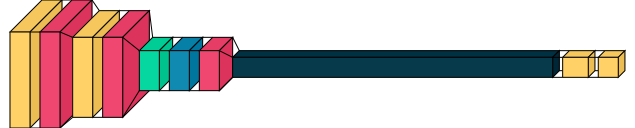

In [35]:
vk.layered_view(model)

In [36]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels), 
    epochs=5, 
    batch_size=200, 
)

Epoch 1/5
 259/1770 [===>..........................] - ETA: 17:25 - loss: 0.4000 - accuracy: 0.8885

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)

In [37]:
predictions = model.predict(test_data)
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)

2766/2766 [==============================] - 62s 22ms/step
[[   0    0    3 ...    0    0    0]
 [   0    0   57 ...    0    0    0]
 [   0    0 2896 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]
 [   0    0    2 ...    0    0    0]]


In [ ]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")

In [ ]:
model.save("model.h5")

# Deployable application


In [38]:
import gradio as gr
import tensorflow as tf
import cv2

In [39]:
img_size = 28

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [40]:
model = tf.keras.models.load_model("model.h5")

In [41]:
def predict(img):

  img = cv2.resize(img, (img_size, img_size))
  img = img.reshape(1, img_size, img_size, 1)

  preds = model.predict(img)[0]

  return {label: float(pred) for label, pred in zip(labels, preds)}

label = gr.outputs.Label(num_top_classes=3)

C:\Users\rasto\AppData\Local\Temp\ipykernel_17660\2657995217.py:10: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
C:\Users\rasto\AppData\Local\Temp\ipykernel_17660\2657995217.py:10: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


In [42]:
interface = gr.Interface(fn=predict, inputs="sketchpad", outputs=label)
interface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 59ms/step
